<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week7/blob/main/Logistic_Regression_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic, Random forest, or KNN? (Core)
Submitted by Kenneth Alaba

## Pre-requisites

In [61]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [62]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/07 Week 7: Classification Models/Wine_cultivars.csv'

## Storing the data in df
df0 = pd.read_csv(filename, )

# display first few rows
df0.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
# Check the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [191]:
df0['Class label'].value_counts(normalize = True)

2    0.398876
1    0.331461
3    0.269663
Name: Class label, dtype: float64

In [65]:
# Visualize Class label and another feature

# Determine which column the class label has highest correlation to
corr = df0.corr()
corr['Class label']

Class label                     1.000000
Alcohol                        -0.328222
Malic Acid                      0.437776
Ash                            -0.049643
Alcalinity of ash               0.517859
Magnesium                      -0.209179
Total phenols                  -0.719163
Flavanoids                     -0.847498
Nonflavonid phenols             0.489109
Proanthocyanins                -0.499130
Color intensity                 0.265668
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Name: Class label, dtype: float64

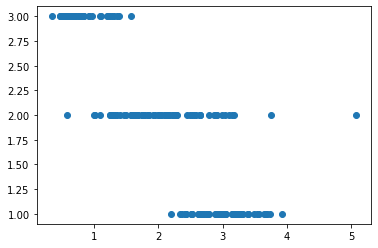

In [66]:
# Class label has the highest correlation with flavanoids content
# Create a scatter plot
plt.scatter(df0['Flavanoids'], df0['Class label'])

From the plot, we can see that there are 3 classification of Grapes but a simple logistic regression only handles binary classification. For simplicity, we only consider Class labels 1 and 2 since label 3 has the smallest sample size in the data set to avoid a one-vs-rest scheme

In [67]:
df0.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


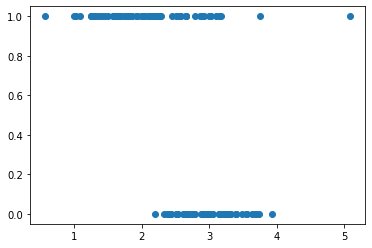

In [68]:
# remove samples that are class label 3
df = df0.loc[df0['Class label'] != 3]

# Set class label 1 as 0 and class label 2 as 1
df['Class label'] = df['Class label'] - 1

# Create a scatter plot
plt.scatter(df['Flavanoids'], df['Class label'])

In [69]:
# Define the target and features
X = df[['Flavanoids']] #df0.drop(columns=['Class label'])
y = df['Class label']

In [70]:
# Split into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)

## Logistic Regression

In [71]:
# Make an instance of the model
logreg = LogisticRegression( C = 1000, penalty = 'none')

# Scaling logistic regression
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

X_test_copy = X_test # Copy before scaling, for plotting purposes

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


LogisticRegression(C=1000, penalty='none')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


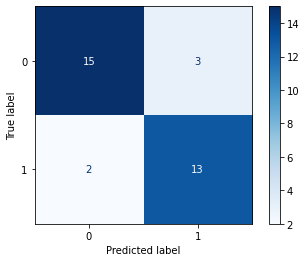

In [72]:
# Evaluate baseline Logreg model
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues');

In [73]:
#Use classifiction_report() to print a report of several metrics for all classes at once

class_rep = classification_report(y_test, logreg.predict(X_test))
print(class_rep)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.81      0.87      0.84        15

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



In [74]:
# Print the model score
print(logreg.score(X_test, y_test))

0.8484848484848485


From the metrics, this baseline Logistic regression model already has a good performance for this data set

In [75]:
# Creates a plot of the sigmoid function
example_df = pd.DataFrame(data = {'Flavanoids': X_test.flatten(),
                     'Class label': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

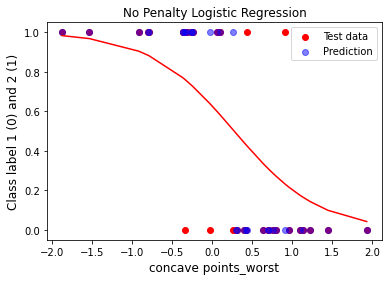

In [76]:
plt.scatter(example_df['Flavanoids'], example_df['Class label'], c = 'r', label = 'Test data ')
plt.scatter(X_test, logreg.predict(X_test), c = 'b', label ='Prediction', alpha = 0.5)
plt.plot(example_df['Flavanoids'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Class label 1 (0) and 2 (1)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)
plt.title('No Penalty Logistic Regression')
plt.legend()

## l1 and l2 regularization

### L1 Penalty

In [77]:
# Make a new instance of the model
l1 = LogisticRegression(solver = 'liblinear', C = 1000, penalty = 'l1')

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
l1.fit(X_train,y_train)

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


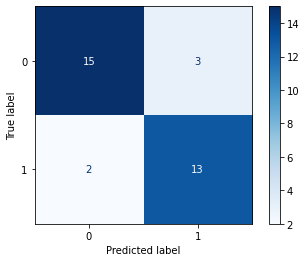

In [78]:
# Evaluate the model
plot_confusion_matrix(l1, X_test, y_test, cmap = 'Blues');

In [79]:
# Creates a plot of the sigmoid function
example_df = pd.DataFrame(data = {'Flavanoids': X_test.flatten(),
                     'Class label': y_test})
example_df['logistic_preds'] = pd.DataFrame(l1.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

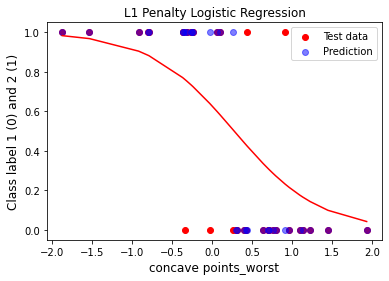

In [80]:
plt.scatter(example_df['Flavanoids'], example_df['Class label'], c = 'r', label = 'Test data ')
plt.scatter(X_test, l1.predict(X_test), c = 'b', label ='Prediction', alpha = 0.5)
plt.plot(example_df['Flavanoids'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Class label 1 (0) and 2 (1)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)
plt.title('L1 Penalty Logistic Regression')
plt.legend()


In [161]:
#Use classifiction_report() to print a report of several metrics for all classes at once

class_rep = classification_report(y_test, l1.predict(X_test))
print(class_rep)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.81      0.87      0.84        15

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



### L2 Penalty

In [156]:
# Make a new instance of the model
l2 = LogisticRegression(solver = 'liblinear', C = 0.6, penalty = 'l2')

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
l2.fit(X_train,y_train)

LogisticRegression(C=0.6, solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


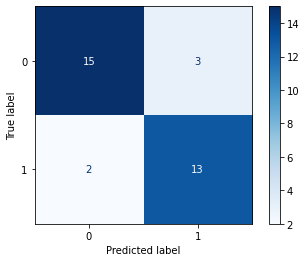

In [157]:
# Evaluate the model
plot_confusion_matrix(l2, X_test, y_test, cmap = 'Blues');

In [158]:
# Creates a plot of the sigmoid function
example_df = pd.DataFrame(data = {'Flavanoids': X_test.flatten(),
                     'Class label': y_test})
example_df['logistic_preds'] = pd.DataFrame(l2.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

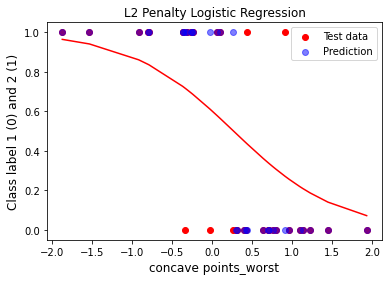

In [159]:
plt.scatter(example_df['Flavanoids'], example_df['Class label'], c = 'r', label = 'Test data ')
plt.scatter(X_test, l2.predict(X_test), c = 'b', label ='Prediction', alpha = 0.5)
plt.plot(example_df['Flavanoids'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Class label 1 (0) and 2 (1)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)
plt.title('L2 Penalty Logistic Regression')
plt.legend()


In [162]:
#Use classifiction_report() to print a report of several metrics for all classes at once

class_rep = classification_report(y_test, l2.predict(X_test))
print(class_rep)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.81      0.87      0.84        15

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



For this data set, there is not much difference in using the L1, L2, and no penalty even when the C value is altered (except for extremely low values)

## KNN Classifier

In [168]:
# Defines the new target and features
# The logreg model used only one column for the features 
X = df0.drop(columns = ['Class label'])
y = df0['Class label']

In [169]:
#Train-test split.  Set the random state to 42
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, stratify = y )

In [184]:
# Import libraries
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

#Create a pipeline with a StandardScaler and a KNeighborsClassifier

### Standard scaler
scaler = StandardScaler()

### Instantiate the knn model
knn = KNeighborsClassifier()

### create the pipeline
knn_pipe = make_pipeline(scaler, knn)


### Fit the model
knn_pipe.fit(X_train, y_train )

### Make predictions and store their test predictions
knn_pred = knn_pipe.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


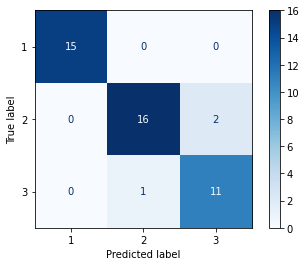

In [185]:
### Display the confusion matrix for referencing
plot_confusion_matrix(knn_pipe, X_test, y_test, cmap = 'Blues');

In [186]:
#Use classifiction_report() to print a report of several metrics for all classes at once

class_rep = classification_report(y_test, knn.predict(X_test))
print(class_rep)
print(knn.score(X_test, y_test))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50        15
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        12

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45

0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being

## Random Forest

In [187]:
# Import library
from sklearn.ensemble import RandomForestClassifier

#Create a pipeline with a StandardScaler and a RandomForestClassifier

### Instantiate the random forest model
rf = RandomForestClassifier()

### create the pipeline
rf_pipe = make_pipeline(scaler, rf)


### Fit the model
rf_pipe.fit(X_train, y_train )

### Make predictions and store their test predictions
rf_pred = rf_pipe.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


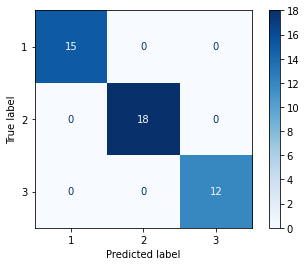

In [188]:
### Display the confusion matrix for referencing
plot_confusion_matrix(rf_pipe, X_test, y_test, cmap = 'Blues');

In [190]:
#Use classifiction_report() to print a report of several metrics for all classes at once

class_rep = classification_report(y_test, rf.predict(X_test))
print(class_rep)
print(knn.score(X_test, y_test))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50        15
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        12

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45

0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Conclusion

**Which model performed the best?** \
From the metric scores, the Logistic Regression model has the best scores but since I used different data for the models, I can't compare their metrics to determine the best model, however, of the three models, the Random Forest has predicted all the class label correctly for the test set. \

**Which hyperparameters did you tune for each of the models?** \
For the three models, the default hyperparameters already has good performance for the used data set so no further tuning was applied. \

**Is there a model that you liked the best and why?** \
For a 1 dimensional feature matrix and a binary classification, the logistic regression is easy to implement and understand plus the fact that the model (sigmoid function) can easily be plotted or visualized. However, even though it can handle multidimensional features and multiclassification (using one-vs-rest), it easily becomes confusing. The Random Forest and KNN models on the other hand can easily handle  multidimensional features and multiclassification. I can't say that I like a model because it depends on the data but for this data set, I prefer the Random Forest because it is easy to implement and has a good performance, being able to predict all the test set correctly.
